In [1]:
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd ~/projects/PMESDR/vagrant/mhardman/
%ls GSX*F13*

/Users/brodzik/projects/PMESDR/vagrant/mhardman
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970227_S2310_E0052_R09975.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S0052_E0234_R09976.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S0234_E0416_R09977.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S0416_E0558_R09978.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S0558_E0740_R09979.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S0740_E0922_R09980.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S0922_E1104_R09981.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S1104_E1246_R09982.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S1246_E1428_R09983.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S1428_E1610_R09984.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S1610_E1752_R09985.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S1752_E1934_R09986.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S1934_E2116_R09987.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S2116_E2258_R09988.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D19970228_S2258_E0040_R09989.nc
GSX_CSU_SSMI_FCDR_V01R00_F13_D1997030

In [19]:
list = glob.glob("GSX*R10005.nc")
list

['GSX_CSU_SSMI_FCDR_V01R00_F13_D19970302_S0209_E0351_R10005.nc']

In [20]:
f = Dataset(list[0], "r", format="NETCDF")
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    creator_email: nsidc@nsidc.org
    creator_url: http://www.nsidc.org/
    gsx_repository: https://bitbucket.org/nsidc/gsx.git
    gsx_variables: brightness_temperature_19V, brightness_temperature_19H, brightness_temperature_22V, brightness_temperature_37V, brightness_temperature_37H, brightness_temperature_85V, brightness_temperature_85H
    institution: National Snow and Ice Data Center
    standard_name_vocabulary: CF Standard Name Table (v27, 28 November 2013)
    gsx_date_created: 2015-10-14 15:08:47.123367
    gsx_source: CSU_SSMI_FCDR_V01R00_F13_D19970302_S0209_E0351_R10005.nc
    gsx_version: 1.6.0
    input_provider: CSU
    platform: DMSP 5D-2/F13 > Defense Meteorological Satellite Program-F13
    sensor: SSM/I > Special Sensor Microwave/Imager
    short_platform: F13
    short_sensor: SSMI
    time_coverage_end: 1997-03-02T03:51:51Z
    time_coverage_start: 1997-0

In [5]:
f.variables['brightness_temperature_19H']

<class 'netCDF4._netCDF4.Variable'>
float32 brightness_temperature_19H(scans_loc1, measurements_loc1)
    standard_name: brightness_temperature
    long_name: NOAA FCDR of 19.35 GHz horizontally polarized brightness temperature
    units: kelvin
    valid_range: [  50.  350.]
    _FillValue: -100.0
    coordinates: longitude_loc1 latitude_loc1
    gsx_field_of_view: efov_19H
    gsx_azimuth_angle: earth_azimuth_angle_loc1
    gsx_incidence_angle: earth_incidence_angle_loc1
unlimited dimensions: 
current shape = (380, 64)
filling on

In [21]:
data = f.variables['brightness_temperature_19H'][:]
np.shape(data)
f.close()

In [22]:
np.amin(data), np.amax(data)

(99.0, 288.53)

In [ ]:
def add_new_swath(image, image_index, list, list_index):
    f = Dataset(list[list_index], "r", format="NETCDF")
    data = f.variables['fcdr_tb37h_env2'][:]
    image[0:data.shape[0], image_index * 90: (image_index * 90) + data.shape[1]] = data
    print("data:", np.amin(data), np.amax(data))
    print("image:",np.amin(image), np.amax(image))
    f.close()
    return(image)

In [ ]:
my_image = np.zeros((3230,90 * 10))
my_image.fill(250.)
my_image = add_new_swath(my_image, 8, list, 0)
my_image = add_new_swath(my_image, 7, list, 1)
my_image = add_new_swath(my_image, 5, list, 2)
my_image = add_new_swath(my_image, 3, list, 3)
my_image = add_new_swath(my_image, 2, list, 4)
my_image = add_new_swath(my_image, 1, list, 5)

In [ ]:
my_image.shape

(-0.5, 63.5, 1600.5, -0.5)

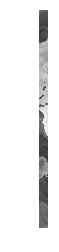

In [23]:
fig, ax = plt.subplots(1, 1)
plt.imshow(data, cmap=plt.cm.gray, interpolation='None',
          vmin=50., vmax=300.)
plt.axis('off')

In [ ]:
outfile = "/Users/brodzik/CSU_swath_20121201_right_side.jpg"
fig.savefig(outfile,dpi=1200)

In [ ]:
my_image = np.zeros((3230,90 * 10))
my_image.fill(250.)
my_image = add_new_swath(my_image, 9, list, 6)
my_image = add_new_swath(my_image, 8, list, 7)
my_image = add_new_swath(my_image, 6, list, 8)
my_image = add_new_swath(my_image, 4, list, 9)
my_image = add_new_swath(my_image, 3, list, 10)
my_image = add_new_swath(my_image, 2, list, 11)
my_image = add_new_swath(my_image, 1, list, 12)
my_image = add_new_swath(my_image, 0, list, 13)


In [ ]:
fig, ax = plt.subplots(1, 1)
plt.imshow(my_image, cmap=plt.cm.gray, interpolation='None',
          vmin=50., vmax=300.)
plt.axis('off')

In [ ]:
outfile = "/Users/brodzik/CSU_swath_20121201_left_side.jpg"
fig.savefig(outfile,dpi=1200)

In [ ]:
def swath_shapes(list):
    for filename in list:
        f = Dataset(filename, "r", format="NETCDF")
        print(filename, np.shape(f.variables['fcdr_tb37h_env2']))
        f.close()

In [ ]:
swath_shapes(list)